In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
%run pathtodata.py

In [7]:
os.chdir(pathtodata())
pdf = pd.read_csv('poloniex_usdt_pairs.csv')

/Users/david/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#Let us get rid of second value of each coin which is just the product of price and q
list_t = []
for i in list(pdf):
    if '1' not in i:
        list_t.append(i)
new_pd = pdf.loc[:,list_t]

In [89]:
#We need to get rid of data points with nan or 0 because they may easily lead to false prediction
#Select on the first 20 columns and starting the rows at 70000 where there is less missing data point
new_pd = new_pd
new_df = new_pd.iloc[1:-3,:20].set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))
new_df = new_df

In [77]:
new_df.iloc[:,1].values

array([ 4745.83294069,  4748.41311982,  4749.32661938, ...,  9556.8263959 ,
        9532.03863448,  9543.05108424])

In [73]:
df_0 = new_df.sample(n=7)
#df_0

In [74]:
def selectperiod(lowerInd, high, day=None, week=None):
    dff = pd.DataFrame([])
    data = []
    if day:
        ind = np.random.randint(lowerInd,high, size=1)[0]
        dff = new_df.iloc[ind:ind+288,:]
        for i in range(day):
            ind = np.random.randint(lowerInd,high, size=1)[0]
            dff.append(new_df.iloc[ind:ind+288,:],ignore_index=True)

selectperiod(1, 55000,4)        

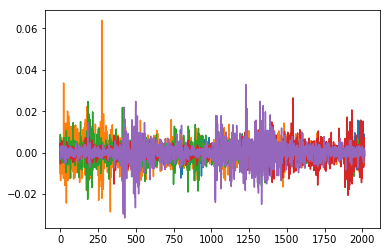

In [229]:
w = 2016
bitcoin_weeks = []
bitcoin_array = new_df.iloc[:,1].values
x = 0
while x < 5:
    first = np.random.randint(1,len(bitcoin_array), size=1)[0]
    if first % w == 0:
        hi = np.exp(np.diff(np.log(bitcoin_array[first:first+w]))) -1
        bitcoin_weeks.append(hi)
        x += 1
        
for i in bitcoin_weeks:
    plt.plot(i)

In [116]:
import seaborn as sns

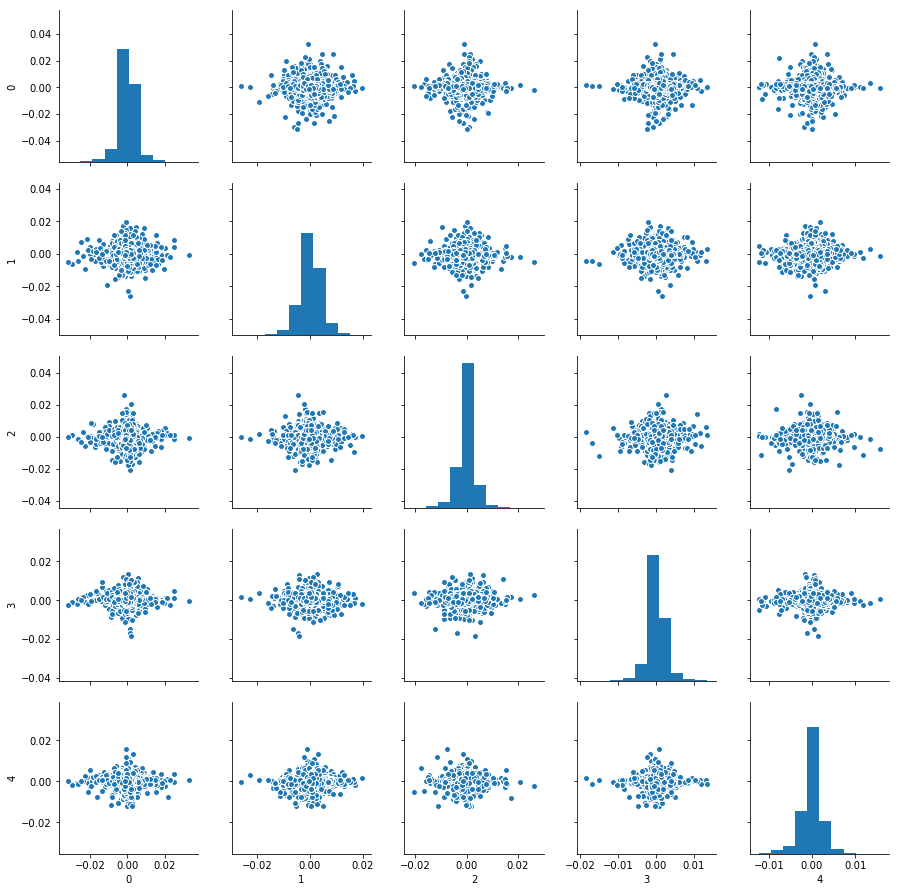

In [147]:
sns.pairplot(pd.DataFrame(bitcoin_weeks).T,palette="husl")

In [232]:
hipso = pd.DataFrame(bitcoin_weeks).T
hipso.columns = [str(i) for i in range(5)]
hipso.index = pd.date_range(start=0,freq='W',periods=2015)

In [227]:
hipso.index

DatetimeIndex(['1970-01-31', '1970-02-28', '1970-03-31', '1970-04-30',
               '1970-05-31', '1970-06-30', '1970-07-31', '1970-08-31',
               '1970-09-30', '1970-10-31',
               ...
               '2137-02-28', '2137-03-31', '2137-04-30', '2137-05-31',
               '2137-06-30', '2137-07-31', '2137-08-31', '2137-09-30',
               '2137-10-31', '2137-11-30'],
              dtype='datetime64[ns]', length=2015, freq='M')

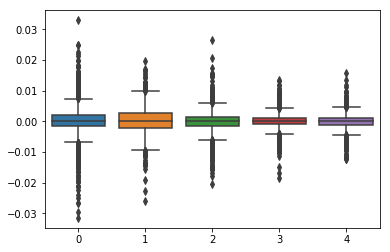

In [161]:
sns.boxplot(data=hipso)

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#Used to vizualize trend and seasonality

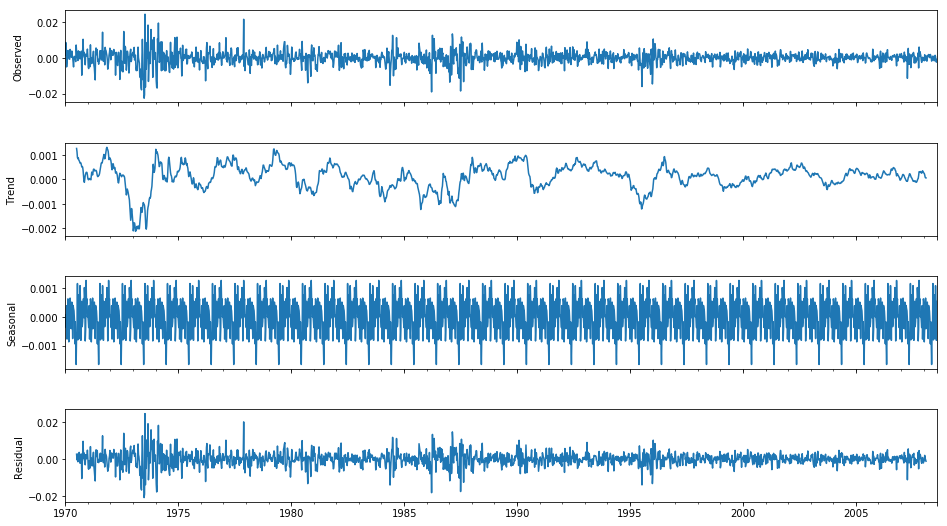

In [233]:
decomposition = seasonal_decompose(hipso.iloc[:,2],)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [235]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


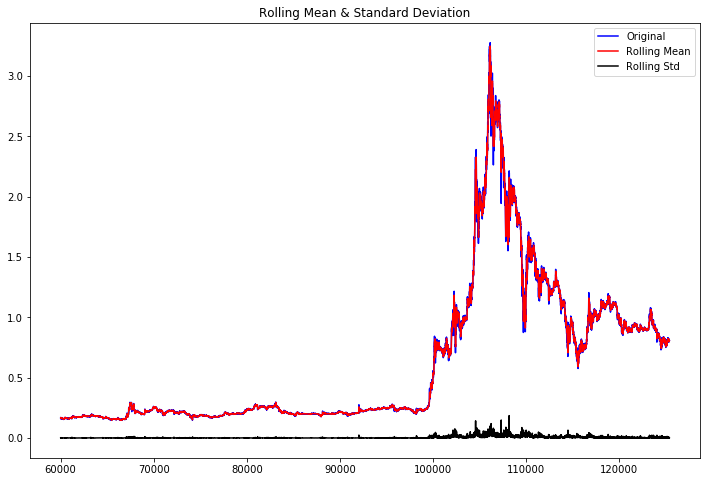

Results of Dickey-Fuller Test:
Test Statistic                    -1.339581
p-value                            0.610875
#Lags Used                        61.000000
Number of Observations Used    65326.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


In [249]:
#Ripple
test_stationarity(new_df.iloc[60000:,3])

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


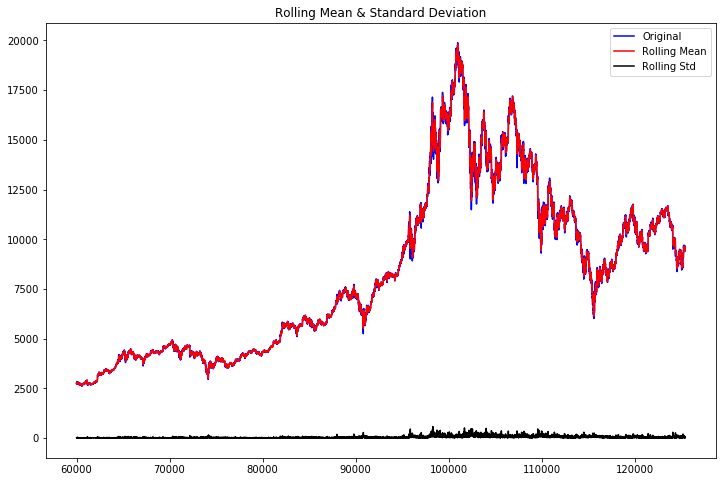

Results of Dickey-Fuller Test:
Test Statistic                    -1.487447
p-value                            0.539712
#Lags Used                        60.000000
Number of Observations Used    65327.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


In [251]:
#Bitcoin
test_stationarity(new_df.iloc[60000:,1])

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


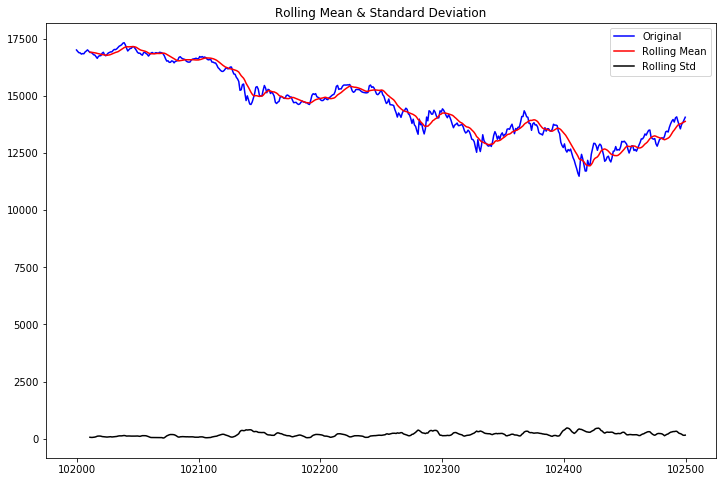

Results of Dickey-Fuller Test:
Test Statistic                  -1.542196
p-value                          0.512544
#Lags Used                       2.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64


In [265]:
#Bitcoin
test_stationarity(new_df.iloc[102000:102500,1])

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


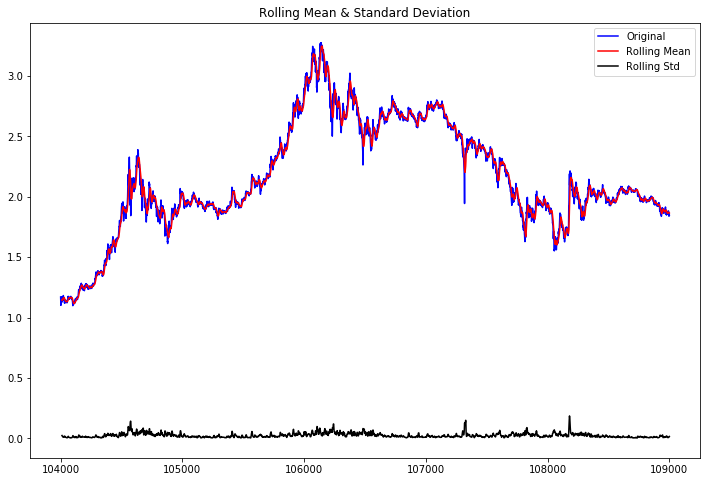

Results of Dickey-Fuller Test:
Test Statistic                   -2.185828
p-value                           0.211429
#Lags Used                       24.000000
Number of Observations Used    4975.000000
Critical Value (1%)              -3.431665
Critical Value (5%)              -2.862121
Critical Value (10%)             -2.567079
dtype: float64


In [266]:
#Ripple
test_stationarity(new_df.iloc[104000:109000:,3])

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


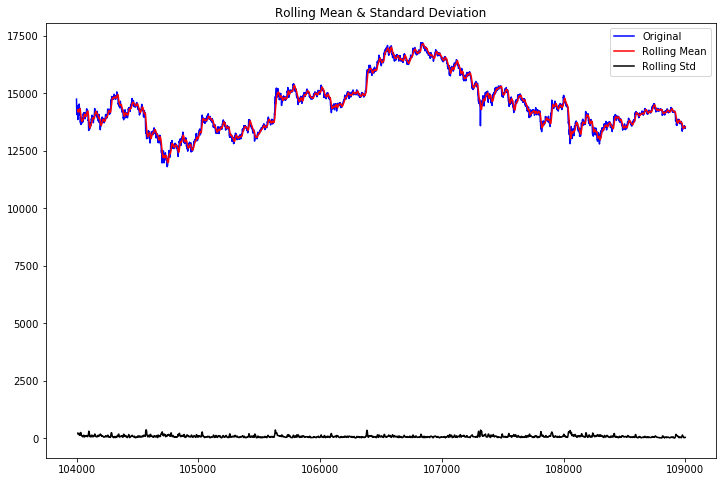

Results of Dickey-Fuller Test:
Test Statistic                   -1.992127
p-value                           0.290036
#Lags Used                        2.000000
Number of Observations Used    4997.000000
Critical Value (1%)              -3.431659
Critical Value (5%)              -2.862119
Critical Value (10%)             -2.567078
dtype: float64


In [271]:
#Bitcoin
test_stationarity(new_df.iloc[104000:109000:,1])

In [272]:
new_df['first_differencebit'] = new_df.iloc[:,1] - new_df.iloc[:,1].shift(1)

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


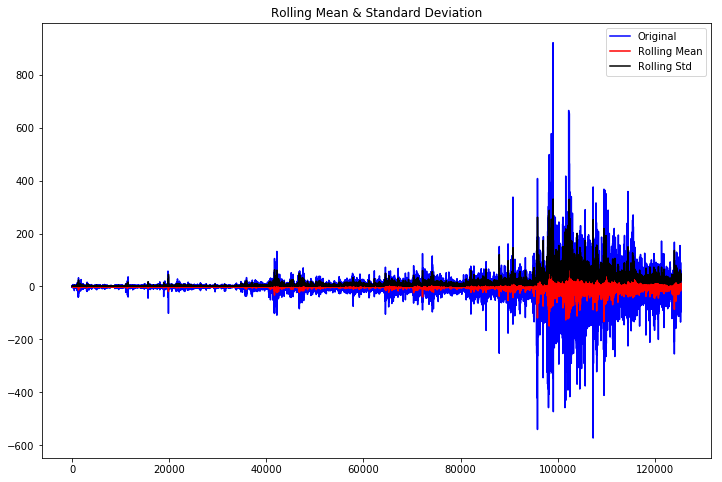

Results of Dickey-Fuller Test:
Test Statistic                    -44.923868
p-value                             0.000000
#Lags Used                         68.000000
Number of Observations Used    125318.000000
Critical Value (1%)                -3.430402
Critical Value (5%)                -2.861563
Critical Value (10%)               -2.566782
dtype: float64


In [274]:
test_stationarity(new_df.first_differencebit.dropna(inplace=False))

In [286]:
kon = pd.DataFrame(new_df.iloc[104000:109000:,3])


In [287]:
kon['first_difference'] = kon.iloc[:,0] - kon.iloc[:,0].shift(1)
kon['seasonal_first_difference'] = kon.first_difference - kon.first_difference.shift(12)

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


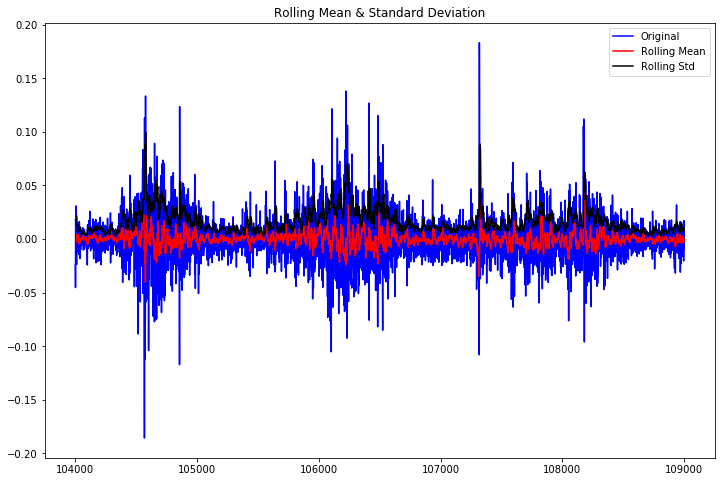

Results of Dickey-Fuller Test:
Test Statistic                -1.636209e+01
p-value                        2.864079e-29
#Lags Used                     2.300000e+01
Number of Observations Used    4.975000e+03
Critical Value (1%)           -3.431665e+00
Critical Value (5%)           -2.862121e+00
Critical Value (10%)          -2.567079e+00
dtype: float64


In [288]:
test_stationarity(kon.first_difference.dropna(inplace=False))

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


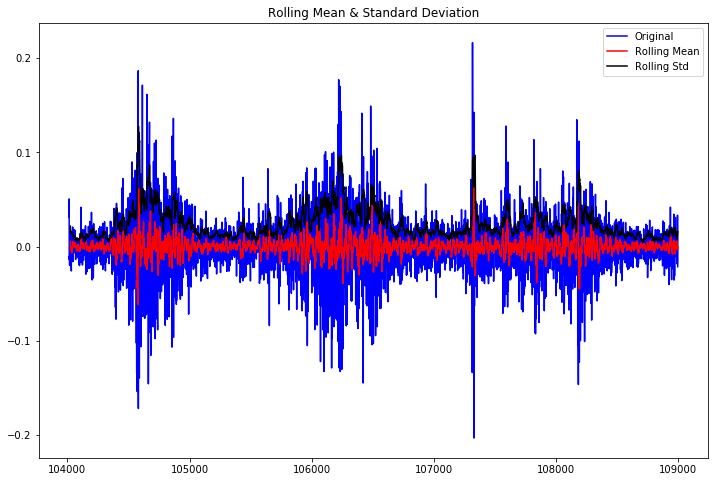

Results of Dickey-Fuller Test:
Test Statistic                  -22.729997
p-value                           0.000000
#Lags Used                       25.000000
Number of Observations Used    4961.000000
Critical Value (1%)              -3.431669
Critical Value (5%)              -2.862123
Critical Value (10%)             -2.567080
dtype: float64


In [289]:
test_stationarity(kon.seasonal_first_difference.dropna(inplace=False))

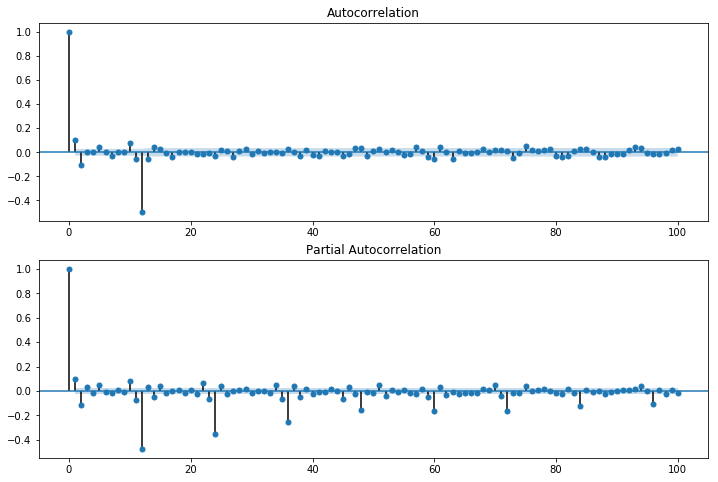

In [295]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(kon.seasonal_first_difference.iloc[13:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(kon.seasonal_first_difference.iloc[13:], lags=100, ax=ax2)

In [314]:
kon.index = pd.date_range(start=0,freq='W',periods=5000)
mod = sm.tsa.statespace.SARIMAX(kon.USDT_XRP, trend='n', order=(0,1,0), seasonal_order=(60,1,1,1))
results = mod.fit()
print(results.summary())

/Users/david/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           USDT_XRP   No. Observations:                 5000
Model:             SARIMAX(0, 1, 0)x(60, 1, 1, 1)   Log Likelihood               12250.501
Date:                            Mon, 16 Apr 2018   AIC                         -24377.003
Time:                                    15:23:42   BIC                         -23972.937
Sample:                                01-04-1970   HQIC                        -24235.384
                                     - 10-25-2065                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L1       -0.1460      0.085     -1.709      0.088      -0.314       0.021
ar.S.L2       -0.3017      0.073   

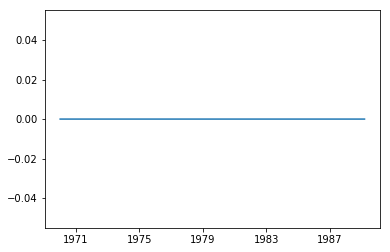

In [319]:
kon['forecast'] = results.predict(start = 0, end= 1000, dynamic= True)  
#kon[['USDT_XRP', 'forecast']].plot(figsize=(12, 8))
#plt.plot(kon['forecast'])

In [ ]:
#First diff when wanting to stationarize a series with strong trend or random walk
#Seasonal Diff 

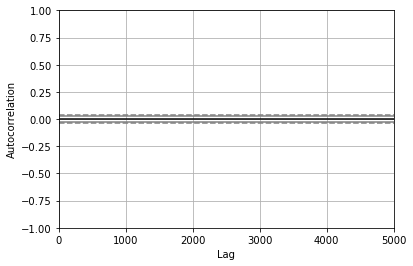

In [318]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(kon['seasonal_first_difference'])